In [6]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from statsmodels.graphics.tsaplots import plot_acf, acf

In [7]:
path = '/Users/idris/Documents/ds_project/forecast_store_sales_kaggle/'

In [8]:
df = pd.read_csv(path + 'data/trainclean.csv', sep=';', parse_dates=['date'], index_col=['date'])

df.head()

,ts_id,bu,famid,sales,onprom
date,,,,,
2013-01-02,1_0,1,0,2.0,0.0
2013-01-03,1_0,1,0,3.0,0.0
2013-01-04,1_0,1,0,3.0,0.0
2013-01-05,1_0,1,0,5.0,0.0
2013-01-06,1_0,1,0,2.0,0.0


In [9]:
df.dtypes

ts_id      object
bu          int64
famid       int64
sales     float64
onprom    float64
dtype: object

<AxesSubplot:xlabel='date'>

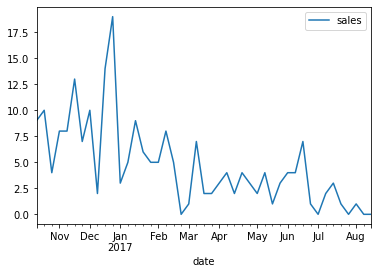

In [10]:
df[['sales']][df.ts_id == '1_4'].resample('W').sum()['2016':].plot()

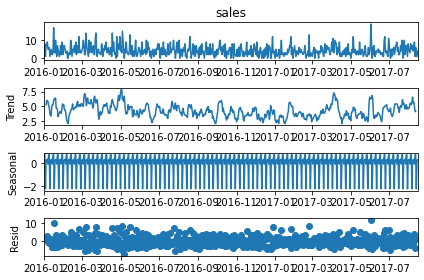

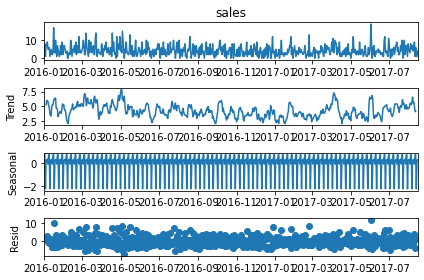

In [12]:
sm.tsa.seasonal_decompose(df[df.ts_id == '1_0']['sales']['2016':]).plot()

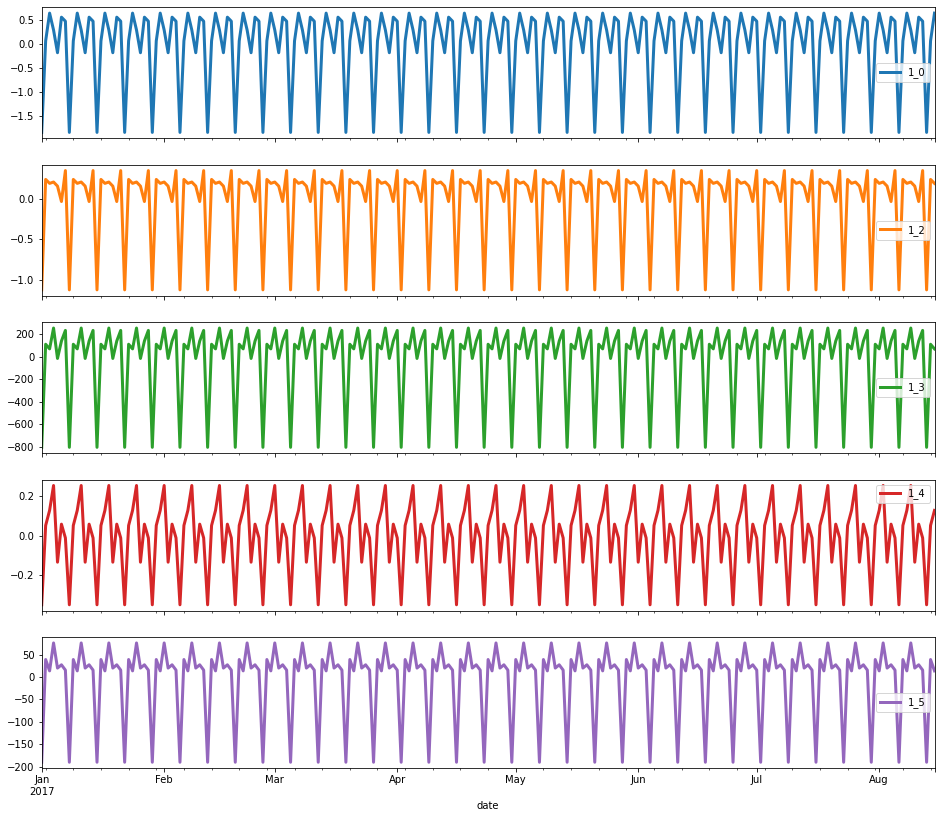

In [13]:
# Init empty dict to store decompose results
seasonality_dict = {}

for ts in df.ts_id.unique()[0:5]:
    decompositions =sm.tsa.seasonal_decompose(df[df.ts_id == ts]['sales'])
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)['2017':'2018'].plot(
    subplots=True, layout=(5, 1), linewidth=3
);

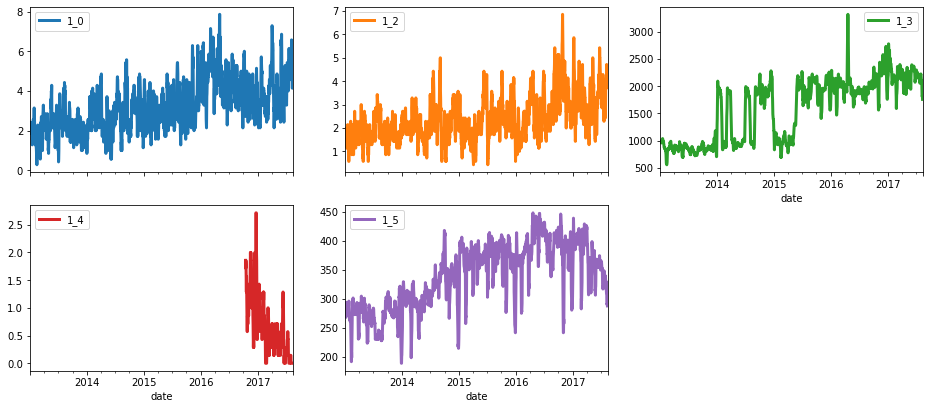

In [14]:
trend_dict = {}

for ts in df.ts_id.unique()[0:5]:
    decomposition =sm.tsa.seasonal_decompose(df[df.ts_id == ts]['sales'])
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 3), linewidth=3);


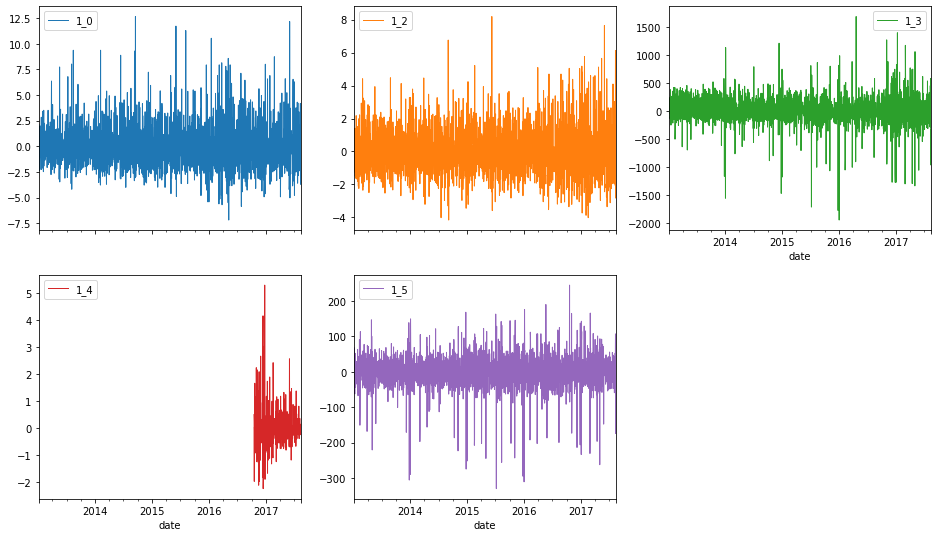

In [15]:
resid_dict = {}

for ts in df.ts_id.unique()[0:5]:
    decomposition =sm.tsa.seasonal_decompose(df[df.ts_id == ts]['sales'])
    # Store back the results
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(subplots=True, layout=(3, 3), linewidth=1);


In [16]:
tsselect = df.ts_id.unique()[0:10]
dfdix = df[df.ts_id.isin(tsselect)]
dfdix.head()

,ts_id,bu,famid,sales,onprom
date,,,,,
2013-01-02,1_0,1,0,2.0,0.0
2013-01-03,1_0,1,0,3.0,0.0
2013-01-04,1_0,1,0,3.0,0.0
2013-01-05,1_0,1,0,5.0,0.0
2013-01-06,1_0,1,0,2.0,0.0


In [17]:
dfd = dfdix.pivot_table(index='date', columns='ts_id', values='sales')
dfd.head()

ts_id,1_0,1_10,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9
date,,,,,,,,,,
2013-01-02,2.0,246.0,2.0,1091.0,NaN,470.652,NaN,1060.0,579.0,164.069
2013-01-03,3.0,203.0,0.0,919.0,NaN,310.655,NaN,836.0,453.0,151.582
2013-01-04,3.0,171.0,3.0,953.0,NaN,198.366,NaN,827.0,460.0,131.411
2013-01-05,5.0,177.0,3.0,1160.0,NaN,301.057,NaN,811.0,464.0,118.613
2013-01-06,2.0,85.0,0.0,407.0,NaN,147.182,NaN,257.0,212.0,60.135


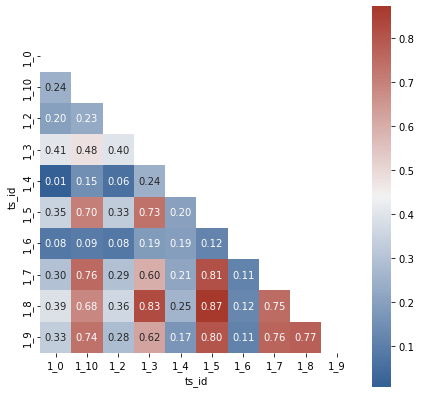

In [18]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = dfd.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

/Users/idris/miniconda3/envs/forecast/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


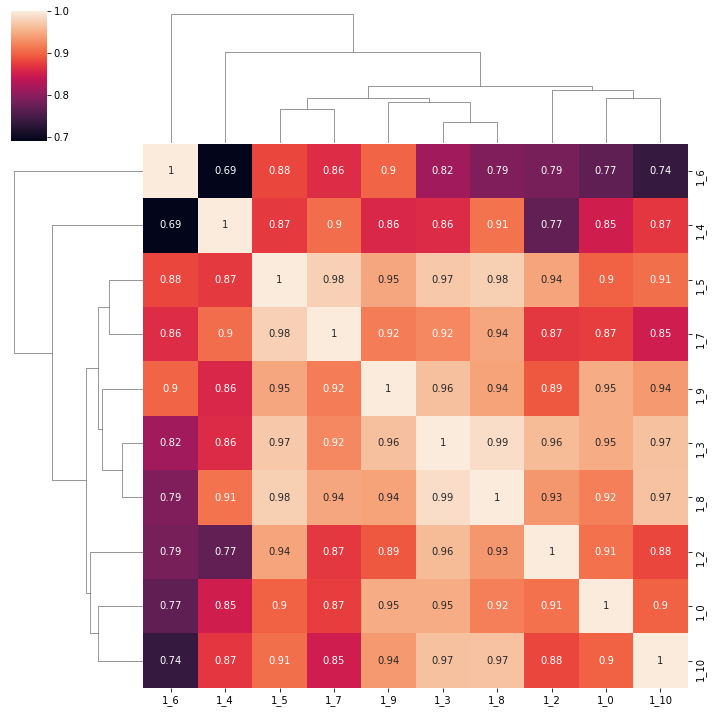

In [19]:
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(dfd[ts].dropna()).seasonal for ts in dfd.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

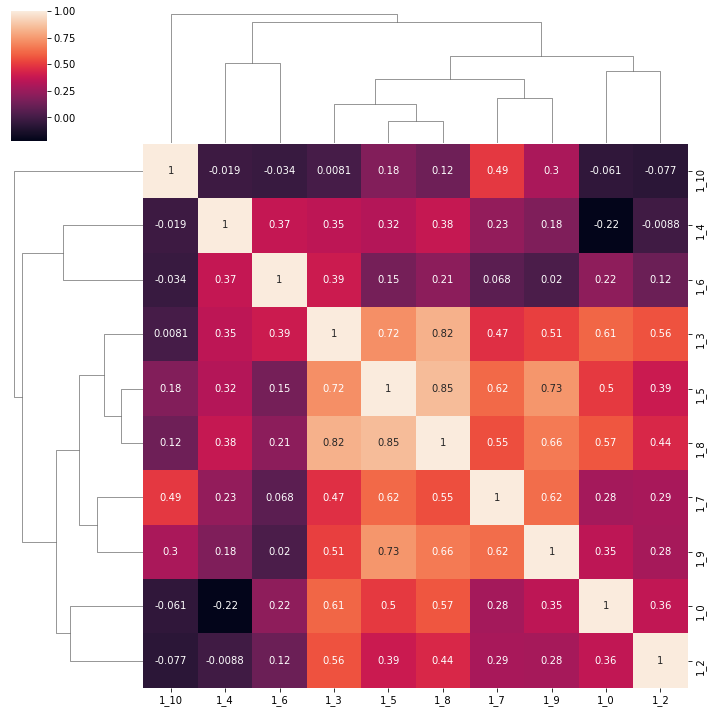

In [20]:
trend_dict = {
    ts: sm.tsa.seasonal_decompose(dfd[ts].dropna()).trend for ts in dfd.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True)
plt.show();

/var/folders/4n/2ycm0xd14jgb1blvw6f3mzvr0000gn/T/ipykernel_6024/2278913430.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/4n/2ycm0xd14jgb1blvw6f3mzvr0000gn/T/ipykernel_6024/2278913430.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/4n/2ycm0xd14jgb1blvw6f3mzvr0000gn/T/ipykernel_6024/2278913430.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/4n/2ycm0xd14jgb1blvw6f3mzvr0000gn/T/ipykernel_6024/2278913430.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/idris/miniconda3/envs/forecast/lib/python3.8/site

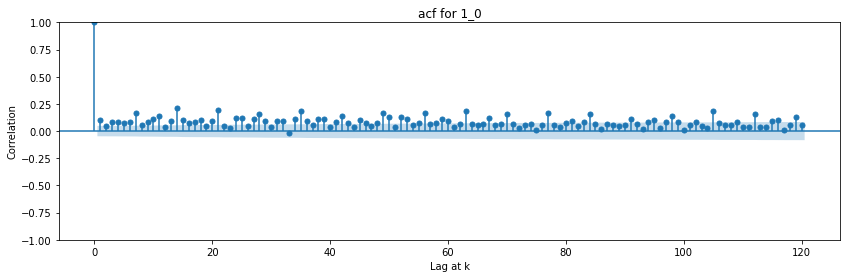

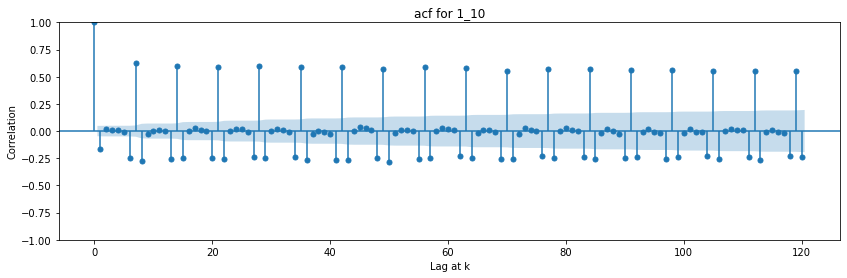

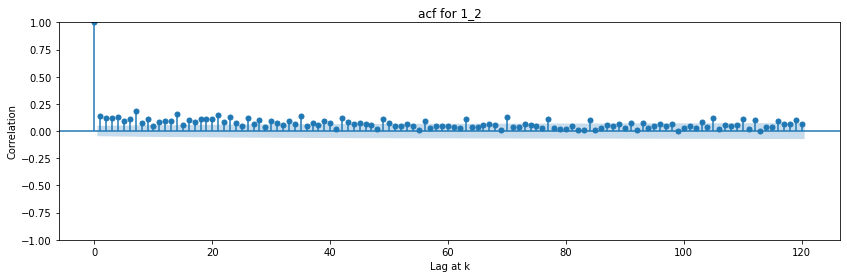

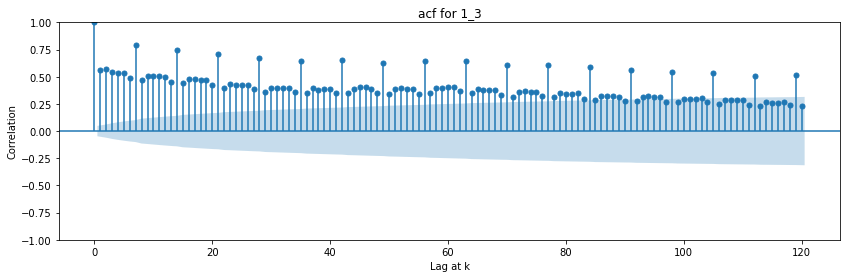

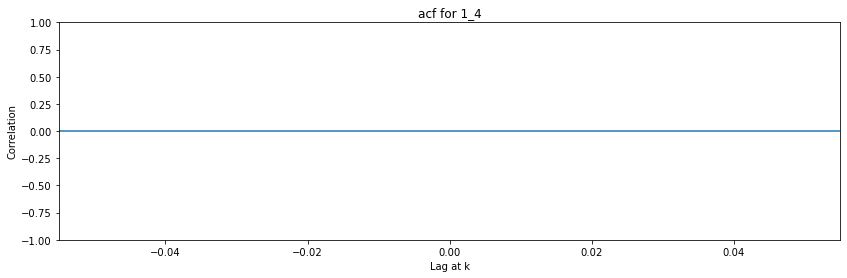

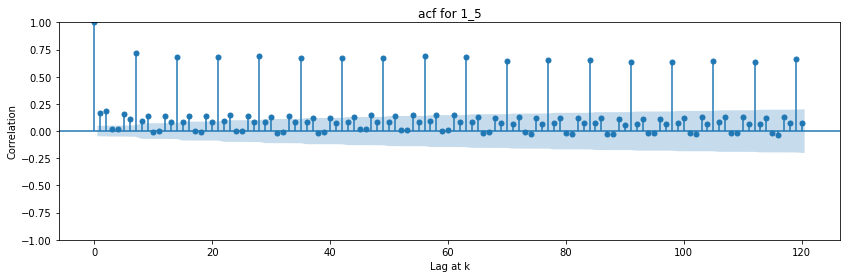

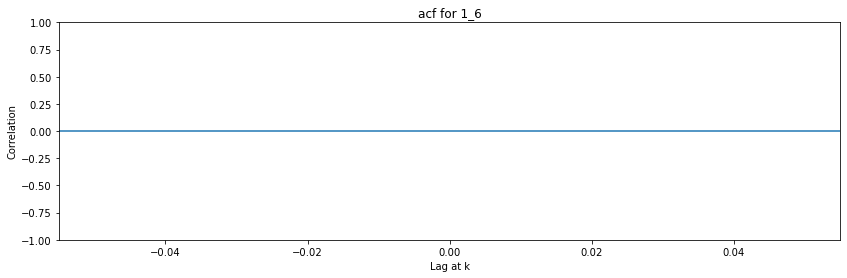

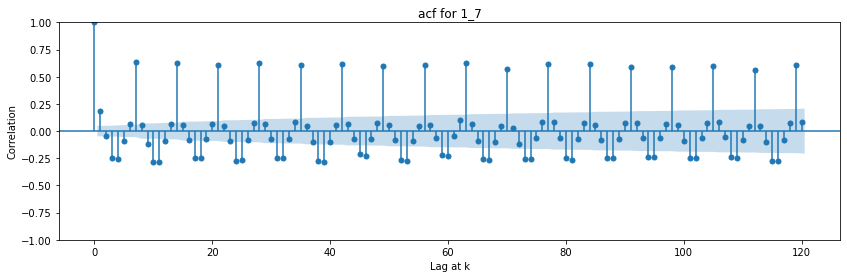

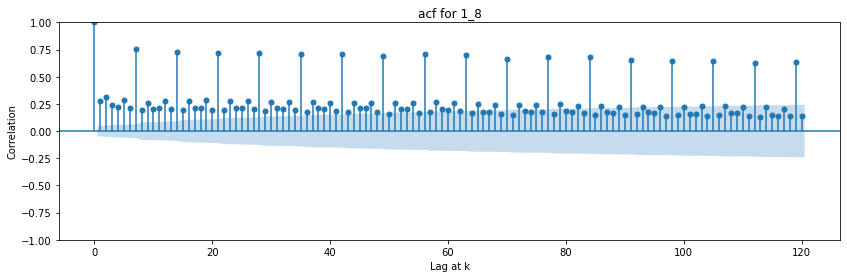

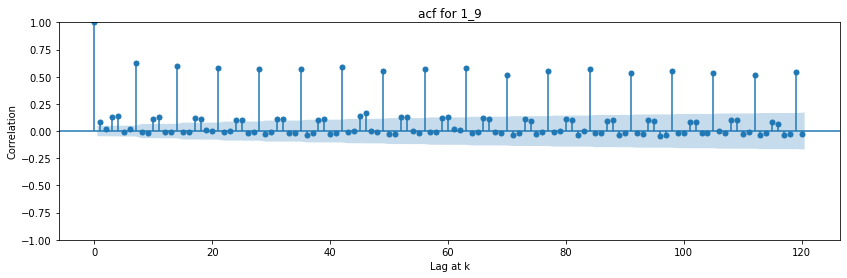

In [22]:
for ts in dfd.columns:
    rcParams["figure.figsize"] = 14, 4

    fig = plot_acf(dfd[ts], lags=120)

    plt.title('acf for {}'.format(ts))

    plt.ylabel("Correlation")

    plt.xlabel("Lag at k")

    fig.show()

In [58]:
df_pivot = df.pivot_table(index='date', columns='ts_id', values='sales')
df_pivot.head()

ts_id,10_0,10_1,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17,...,9_29,9_3,9_30,9_31,9_32,9_5,9_6,9_7,9_8,9_9
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,3.0,NaN,57.0,41.164,2579.0,8.0,2.0,NaN,NaN,NaN,...,83.0,1309.0,NaN,NaN,29.214,1001.0,NaN,2624.0,473.0,725.902
2013-01-03,2.0,NaN,38.0,14.470,1984.0,1.0,0.0,NaN,NaN,NaN,...,66.0,1047.0,NaN,NaN,25.000,747.0,NaN,1781.0,231.0,414.087
2013-01-04,2.0,NaN,22.0,10.691,1565.0,2.0,0.0,NaN,NaN,NaN,...,57.0,986.0,NaN,NaN,11.000,513.0,NaN,1383.0,205.0,238.125
2013-01-05,0.0,NaN,43.0,13.891,2544.0,5.0,3.0,NaN,NaN,NaN,...,84.0,1415.0,NaN,NaN,28.361,631.0,NaN,2259.0,416.0,472.871


In [70]:
l_lag = []
df_col = df_pivot.columns

In [71]:
for ts in df_col:
    
    afc_array = acf(df_pivot[ts], nlags=360, missing='drop')
    lag_array = afc_array.argsort()[-11:][::-1]
    lag_array = np.delete(lag_array, 0)
    lag_array = np.sort(lag_array)
    l_lag.append(lag_array)

In [72]:
df_lag = pd.DataFrame(l_lag).T
df_lag.columns = df_col

df_lag

ts_id,10_0,10_1,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17,...,9_29,9_3,9_30,9_31,9_32,9_5,9_6,9_7,9_8,9_9
0,1,1,7,1,7,1,1,1,1,5,...,7,1,1,1,1,7,1,28,7,7
1,4,2,14,2,14,2,5,2,2,20,...,14,7,2,2,7,14,6,63,14,14
2,7,3,21,3,28,6,7,3,3,21,...,21,14,5,3,14,21,7,91,21,28
3,13,4,28,4,63,7,8,4,4,32,...,28,21,6,4,21,28,8,119,28,35
4,14,5,35,5,91,14,11,5,5,35,...,35,28,7,5,28,35,13,154,35,56
5,21,6,42,6,119,21,22,6,7,47,...,42,35,8,6,35,42,14,182,42,63
6,29,7,49,7,154,28,23,7,8,77,...,49,42,9,7,42,49,15,210,49,91
7,35,8,56,8,182,42,24,8,13,130,...,56,49,14,8,49,56,20,245,56,119
8,105,9,63,9,245,168,28,14,14,144,...,63,56,21,9,56,63,21,273,63,154
9,119,11,119,359,273,358,42,28,15,251,...,91,63,28,338,308,91,42,336,91,182


In [73]:
df_lag.shape

(10, 1729)